<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transformer_encoder_daug_saffine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [3]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [4]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [5]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [6]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [7]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [8]:
!wget https://github.com/takayama-rado/trado_samples/archive/master.zip

--2024-06-01 03:31:19--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-06-01 03:31:19--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [           <=>      ]  75.12M  19.6MB/s    in 3.8s    

2024-06-01 03:31:23 (19.6 MB/s) - ‘master.zip’ saved [78771525]



In [9]:
!unzip -o master.zip -d master

Archive:  master.zip
9f8a26e5cba6d7a28e56f3cd071711bb09810483
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [10]:
!mv master/trado_samples-main/src/modules_gislr .

In [11]:
!rm -rf master master.zip gislr_top10.zip

In [12]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [13]:
import copy
import json
import math
import os
import random
import sys
from functools import partial
from inspect import signature
from pathlib import Path
from typing import (
    Any,
    Dict,
    List
)

# Third party's modules
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    Identity,
    GPoolRecognitionHead,
    TransformerEnISLR
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor
)

# 3. Implement spatial affine transformation.

In [14]:
def get_affine_matrix_2d(center,
                         trans,
                         scale,
                         rot,
                         skew,
                         to_radians=True,
                         order=["center", "scale", "rot", "skew", "trans"],
                         dtype=np.float32):
    center = np.array(center)
    trans = np.array(trans)
    scale = np.array(scale)
    center_m = np.array([[1, 0, -center[0]],
                         [0, 1, -center[1]],
                         [0, 0, 1]])
    scale_m = np.array([[scale[0], 0, 0],
                        [0, scale[1], 0],
                        [0, 0, 1]])
    rot = np.radians(rot) if to_radians else rot
    _cos = np.cos(rot)
    _sin = np.sin(rot)
    rot_m = np.array([[_cos, -_sin, 0],
                      [_sin, _cos, 0],
                      [0, 0, 1]])
    _tan = np.tan(np.radians(skew)) if to_radians else np.tan(skew)
    skew_m = np.array([[1, _tan[0], 0],
                       [_tan[1], 1, 0],
                       [0, 0, 1]])
    move = center + trans
    trans_m = np.array([[1, 0, move[0]],
                        [0, 1, move[1]],
                        [0, 0, 1]])

    mat = np.identity(3, dtype=dtype)
    for name in order:
        if name == "center":
            mat = np.matmul(center_m, mat)
        if name == "scale":
            mat = np.matmul(scale_m, mat)
        if name == "rot":
            mat = np.matmul(rot_m, mat)
        if name == "skew":
            mat = np.matmul(skew_m, mat)
        if name == "trans":
            mat = np.matmul(trans_m, mat)
    return mat.astype(dtype)

In [15]:
def apply_affine(inputs, mat, channel_first=True):
    if channel_first:
        # `[C, T, J] -> [T, J, C]`
        inputs = inputs.transpose([1, 2, 0])
    xy = inputs[:, :, :2]
    xy = np.concatenate([xy, np.ones([xy.shape[0], xy.shape[1], 1])], axis=-1)
    xy = np.einsum("...j,ij", xy, mat)
    inputs[:, :, :2] = xy[:, :, :-1]
    if channel_first:
        # `[T, J, C] -> [C, T, J]`
        inputs = inputs.transpose([2, 0, 1])
    return inputs

In [16]:
class RandomAffineTransform2D():
    def __init__(self,
                 apply_ratio,
                 center_joints,
                 target_joints,
                 trans_range,
                 scale_range,
                 rot_range,
                 skew_range,
                 channel_first=True,
                 apply_post_mask=True,
                 random_seed=None,
                 order=["center", "scale", "rot", "skew", "trans"],
                 dtype=np.float32):
        self.apply_ratio = apply_ratio
        self.center_joints = center_joints
        self.target_joints = target_joints
        self.trans_range = trans_range
        self.scale_range = scale_range
        self.rot_range = np.radians(rot_range)
        self.skew_range = np.radians(skew_range)
        self.order = order
        self.dtype = dtype
        self.channel_first = channel_first
        self.apply_post_mask = apply_post_mask
        if random_seed is not None:
            self.rng = np.random.default_rng(random_seed)
        else:
            self.rng = np.random.default_rng()

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:
        if self.rng.uniform() > self.apply_ratio:
            return data
        # `[C, T, J]`
        feature = data["feature"]

        # Calculate center position.
        temp = feature[:, :, self.center_joints]
        mask = np.sum(temp, axis=(0, 2)) != 0
        if np.all(mask == np.False_):
            return data

        # Use x and y only.
        # `[C, T, J] -> [C, J] -> [C]`
        center = temp[:, mask].mean(axis=1).mean(axis=1)[:2]

        trans = self.rng.uniform(self.trans_range[0], self.trans_range[1], 2)
        scale = self.rng.uniform(self.scale_range[0], self.scale_range[1], 2)
        rot = self.rng.uniform(self.rot_range[0], self.rot_range[1])
        skew = self.rng.uniform(self.skew_range[0], self.skew_range[1], 2)

        # Calculate matrix.
        mat = get_affine_matrix_2d(center, trans, scale, rot, skew,
            to_radians=False, order=self.order, dtype=self.dtype)

        # Apply transform.
        if self.apply_post_mask:
            temp = feature.reshape([feature.shape[0], -1])
            mask = (temp == 0).all(axis=0).reshape(
                [1, feature.shape[1], feature.shape[2]])
            mask = np.bitwise_not(mask).astype(feature.dtype)
        else:
            mask = None
        target = feature[:, :, self.target_joints]
        target = apply_affine(target, mat, self.channel_first)
        feature[:, :, self.target_joints] = target
        if mask is not None:
            feature *= mask
        data["feature"] = feature
        return data

# 4. Sanity check

In [17]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/36257.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/30680.hdf5')]


In [18]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [19]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

apply_ratio = 0.5
trans_range = (-0.1, 0.1)
scale_range = (1.0/1.5, 1.5)
rot_range = (-30, 30)
skew_range = (-30, 30)

pre_transforms_w_norm = Compose([trans_select_feature,
                                 trans_repnan,
                                 trans_norm])

pre_transforms_wo_norm = Compose([trans_select_feature,
                                  trans_repnan])

transforms_default = Compose([ToTensor()])

transforms_pre_saffine_whole = Compose([
    RandomAffineTransform2D(
        apply_ratio=apply_ratio,
        center_joints=[0, 2],
        target_joints=np.arange(0, len(use_landmarks)),
        trans_range=trans_range,
        scale_range=scale_range,
        rot_range=rot_range,
        skew_range=skew_range),
    trans_norm,
    ToTensor()])

transforms_post_saffine_whole = Compose([
    RandomAffineTransform2D(
        apply_ratio=apply_ratio,
        center_joints=[0, 2],
        target_joints=np.arange(0, len(use_landmarks)),
        trans_range=trans_range,
        scale_range=scale_range,
        rot_range=rot_range,
        skew_range=skew_range),
    ToTensor()])

transforms_post_saffine_parts = Compose([
    # Face.
    RandomAffineTransform2D(
        apply_ratio=apply_ratio,
        center_joints=[0, 2],
        target_joints=np.arange(0, 76),
        trans_range=trans_range,
        scale_range=scale_range,
        rot_range=rot_range,
        skew_range=skew_range),
    # LHand.
    RandomAffineTransform2D(
        apply_ratio=apply_ratio,
        center_joints=np.array([0, 2, 5, 9, 13, 17])+76,
        target_joints=np.arange(76, 76+21),
        trans_range=trans_range,
        scale_range=scale_range,
        rot_range=rot_range,
        skew_range=skew_range),
    # Pose.
    RandomAffineTransform2D(
        apply_ratio=apply_ratio,
        center_joints=np.array([0, 1])+76+21,
        target_joints=np.arange(76+21, 76+21+12),
        trans_range=trans_range,
        scale_range=scale_range,
        rot_range=rot_range,
        skew_range=skew_range),
    # RHand.
    RandomAffineTransform2D(
        apply_ratio=apply_ratio,
        center_joints=np.array([0, 2, 5, 9, 13, 17])+76+21+12,
        target_joints=np.arange(76+21+12, 76+21+12+21),
        trans_range=trans_range,
        scale_range=scale_range,
        rot_range=rot_range,
        skew_range=skew_range),
    ToTensor()])


In [20]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms_wo_norm, transforms=transforms_pre_saffine_whole)

dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
try:
    data = next(iter(dataloader))
    feature_origin = data["feature"]

    print(feature_origin.shape)
except Exception as inst:
    print(inst)

torch.Size([2, 2, 14, 130])


In [21]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_layer_norm_eps = 1e-5
tren_norm_first = True
tren_add_bias = True
tren_add_tailnorm = True

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

# 5. Train and evaluation

## 5.1 Set common parameters.

In [22]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


## 5.2 Run training process

### Default settings

In [23]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [24]:
tren_norm_first = True
tren_add_tailnorm = True

model_default = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_default)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_default.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [25]:
# Train, validation, and evaluation.
model_default.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_default, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_default, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_default, device)
        test_accs.append(acc)
train_losses_default = np.array(train_losses)
val_losses_default = np.array(val_losses)
test_accs_default = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_default.min()} at {np.argmin(val_losses_default)+1} epoch.")
print(f"Maximum accuracy:{test_accs_default.max()} at {np.argmax(test_accs_default)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.558914 [    0/ 3881]
loss:1.855397 [ 3200/ 3881]
Done. Time:6.237153717000012
Training performance: 
 Avg loss:2.108112

Start validation.
Done. Time:0.24819224300000542
Validation performance: 
 Avg loss:1.865472

Start evaluation.
Done. Time:1.2701316250000332
Test performance: 
 Accuracy:40.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.835340 [    0/ 3881]
loss:1.423810 [ 3200/ 3881]
Done. Time:2.9664745599999947
Training performance: 
 Avg loss:1.386594

Start validation.
Done. Time:0.2351245269999822
Validation performance: 
 Avg loss:1.687808

Start evaluation.
Done. Time:1.164326017999997
Test performance: 
 Accuracy:44.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.158141 [    0/ 3881]
loss:0.823967 [ 3200/ 3881]
Done

### Apply spatial affine before normalization.

In [26]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms_wo_norm,
    transforms=transforms_pre_saffine_whole,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [27]:
tren_norm_first = True
tren_add_tailnorm = True

model_pre_saffine_whole = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_pre_saffine_whole)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_pre_saffine_whole.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [28]:
# Train, validation, and evaluation.
model_pre_saffine_whole.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_pre_saffine_whole, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_pre_saffine_whole, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_pre_saffine_whole, device)
        test_accs.append(acc)
train_losses_pre_saffine_whole = np.array(train_losses)
val_losses_pre_saffine_whole = np.array(val_losses)
test_accs_pre_saffine_whole = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_pre_saffine_whole.min()} at {np.argmin(val_losses_pre_saffine_whole)+1} epoch.")
print(f"Maximum accuracy:{test_accs_pre_saffine_whole.max()} at {np.argmax(test_accs_pre_saffine_whole)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.826497 [    0/ 3881]
loss:1.870419 [ 3200/ 3881]
Done. Time:6.7435616850000315
Training performance: 
 Avg loss:2.190422

Start validation.
Done. Time:0.3319183900000553
Validation performance: 
 Avg loss:1.984560

Start evaluation.
Done. Time:1.2477103859999943
Test performance: 
 Accuracy:32.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.766589 [    0/ 3881]
loss:1.653625 [ 3200/ 3881]
Done. Time:9.635100814999987
Training performance: 
 Avg loss:1.669159

Start validation.
Done. Time:0.29747757899997396
Validation performance: 
 Avg loss:1.778204

Start evaluation.
Done. Time:1.3939739329999838
Test performance: 
 Accuracy:31.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.619771 [    0/ 3881]
loss:1.256673 [ 3200/ 3881]
Don

### Apply spatial affine after normalization.

In [29]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_post_saffine_whole,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [30]:
tren_norm_first = True
tren_add_tailnorm = True

model_post_saffine_whole = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_post_saffine_whole)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_post_saffine_whole.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [31]:
# Train, validation, and evaluation.
model_post_saffine_whole.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_post_saffine_whole, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_post_saffine_whole, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_post_saffine_whole, device)
        test_accs.append(acc)
train_losses_post_saffine_whole = np.array(train_losses)
val_losses_post_saffine_whole = np.array(val_losses)
test_accs_post_saffine_whole = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_post_saffine_whole.min()} at {np.argmin(val_losses_post_saffine_whole)+1} epoch.")
print(f"Maximum accuracy:{test_accs_post_saffine_whole.max()} at {np.argmax(test_accs_post_saffine_whole)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.576798 [    0/ 3881]
loss:2.007964 [ 3200/ 3881]
Done. Time:7.1164940860001025
Training performance: 
 Avg loss:2.275797

Start validation.
Done. Time:0.2892059690000224
Validation performance: 
 Avg loss:1.985127

Start evaluation.
Done. Time:1.23264277699991
Test performance: 
 Accuracy:30.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.740651 [    0/ 3881]
loss:1.403466 [ 3200/ 3881]
Done. Time:4.780454469000006
Training performance: 
 Avg loss:1.711946

Start validation.
Done. Time:0.28961700300010307
Validation performance: 
 Avg loss:1.612931

Start evaluation.
Done. Time:1.2175597479999851
Test performance: 
 Accuracy:47.0%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.623530 [    0/ 3881]
loss:1.336247 [ 3200/ 3881]
Done.

### Apply parts-based spatial affine after normalization.

In [32]:
# Build dataloaders.
train_dataset = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_post_saffine_parts,
    load_into_ram=load_into_ram)
val_dataset = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)
test_dataset = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms_w_norm,
    transforms=transforms_default,
    load_into_ram=load_into_ram)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

In [33]:
tren_norm_first = True
tren_add_tailnorm = True

model_post_saffine_parts = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_post_saffine_parts)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_post_saffine_parts.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (dropout): Dropout(p=0.1, inp

In [34]:
# Train, validation, and evaluation.
model_post_saffine_parts.to(device)

train_losses = []
val_losses = []
test_accs = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader, model_post_saffine_parts, loss_fn, optimizer, device)
    val_loss = val_loop(val_dataloader, model_post_saffine_parts, loss_fn, device)
    val_losses.append(val_loss)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc = test_loop(test_dataloader, model_post_saffine_parts, device)
        test_accs.append(acc)
train_losses_post_saffine_parts = np.array(train_losses)
val_losses_post_saffine_parts = np.array(val_losses)
test_accs_post_saffine_parts = np.array(test_accs)

print(f"Minimum validation loss:{val_losses_post_saffine_parts.min()} at {np.argmin(val_losses_post_saffine_parts)+1} epoch.")
print(f"Maximum accuracy:{test_accs_post_saffine_parts.max()} at {np.argmax(test_accs_post_saffine_parts)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.982381 [    0/ 3881]
loss:1.716059 [ 3200/ 3881]
Done. Time:7.150286459999961
Training performance: 
 Avg loss:2.158071

Start validation.
Done. Time:0.44729227600009835
Validation performance: 
 Avg loss:2.220928

Start evaluation.
Done. Time:1.2240048329999809
Test performance: 
 Accuracy:23.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:2.217699 [    0/ 3881]
loss:1.451017 [ 3200/ 3881]
Done. Time:5.378131757999881
Training performance: 
 Avg loss:1.652972

Start validation.
Done. Time:0.3002940750000107
Validation performance: 
 Avg loss:1.840252

Start evaluation.
Done. Time:1.2376491480001732
Test performance: 
 Accuracy:36.5%
--------------------------------------------------------------------------------
Epoch 3
Start training.
loss:1.263408 [    0/ 3881]
loss:1.307282 [ 3200/ 3881]
Done

### Plort result
#### Recognition performance

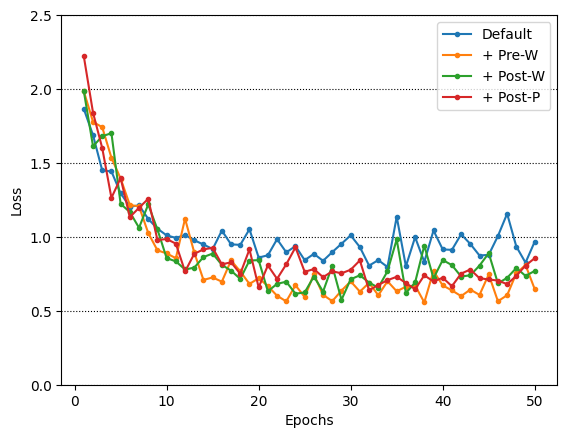

In [35]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_default)+1)
plt.plot(xs, val_losses_default, label="Default", marker=".")
plt.plot(xs, val_losses_pre_saffine_whole, label="+ Pre-W", marker=".")
plt.plot(xs, val_losses_post_saffine_whole, label="+ Post-W", marker=".")
plt.plot(xs, val_losses_post_saffine_parts, label="+ Post-P", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

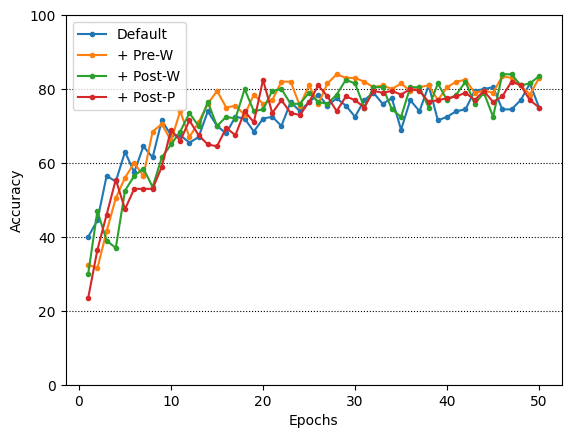

In [36]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_default)+1)
plt.plot(xs, test_accs_default, label="Default", marker=".")
plt.plot(xs, test_accs_pre_saffine_whole, label="+ Pre-W", marker=".")
plt.plot(xs, test_accs_post_saffine_whole, label="+ Post-W", marker=".")
plt.plot(xs, test_accs_post_saffine_parts, label="+ Post-P", marker=".")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()